In [2]:
import numpy as np
import matplotlib.pyplot as plt

PROBLEM 1:

In [ ]:
def Mandelbrot(z, C):
    zNew = z**2 + C
    return zNew

In [28]:
def convergenceChecker(C):
    value = 0
    for i in range(30):
        if (value < 50):
            value = Mandelbrot(value, C)
            if (i == 29):
                return True
        else:
            return False

valuesToTest = [-4, -2.001, -2, -1.999, -1, 0, 0.5, 1, 2]

for i in valuesToTest:
    print(f"{i} is {convergenceChecker(i)}")

-4 is False
-2.001 is False
-2 is True
-1.999 is True
-1 is True
0 is True
0.5 is False
1 is False
2 is False


PROBLEM 2

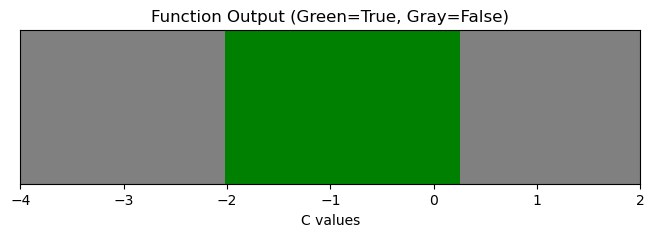

In [32]:
C_values = np.linspace(-4,2,100)

results = np.array([convergenceChecker(c) for c in C_values], dtype=int)
results_2d = results[np.newaxis, :]

fig, ax = plt.subplots(figsize=(8, 2))
cax = ax.imshow(results_2d, 
                aspect="auto", 
                cmap=plt.cm.colors.ListedColormap(["gray", "green"]),
                extent=[C_values.min(), C_values.max(), 0, 1])
ax.set_yticks([])
ax.set_xlabel("C values")
ax.set_title("Function Output (Green=True, Gray=False)")

plt.show()

PROBLEM 3

In [41]:
def complexConvergence(C):
    value = 0
    for i in range(50):
        if (abs(value) < 50):
            value = Mandelbrot(value, C)
            if (i == 49):
                return True
        else:
            return False
        
C_values = [complex(-0.4, 0.2), complex(0.4, 0.6), complex(-1.7, 0), complex(-1.7, 0.001), complex(-1.778, 0), complex(-1.778, 0.001), complex(-1.25, 0), complex(-1.25, 0.04), complex(-0.125, -0.9), complex(-0.125, -0.85)]

for i in C_values:
    print(f"{i} is {complexConvergence(i)}")

(-0.4+0.2j) is True
(0.4+0.6j) is False
(-1.7+0j) is True
(-1.7+0.001j) is False
(-1.778+0j) is True
(-1.778+0.001j) is True
(-1.25+0j) is True
(-1.25+0.04j) is True
(-0.125-0.9j) is False
(-0.125-0.85j) is True


PROBLEM 4

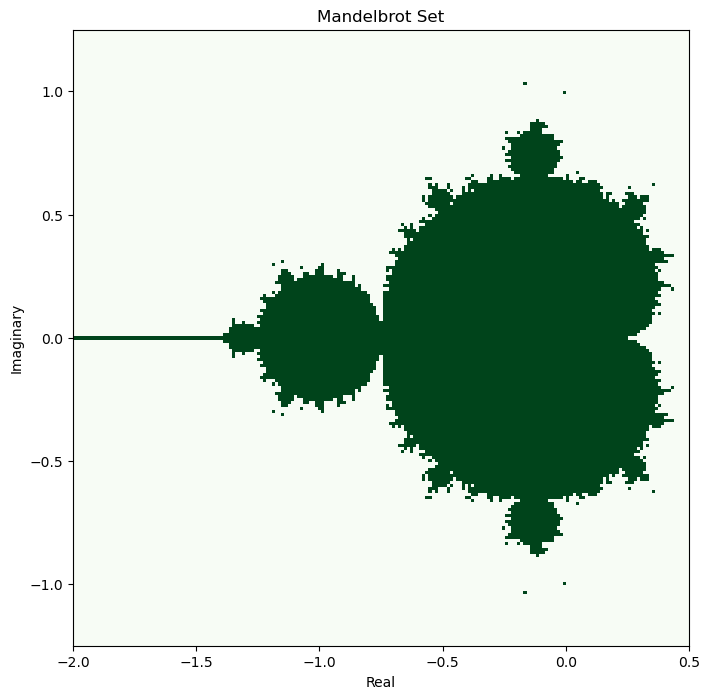

In [43]:
x = np.linspace(-2, 0.5, 201)
y = np.linspace(-1.25, 1.25, 201)
result = np.zeros((len(y), len(x)))

for i, yy in enumerate(y):
    for j, xx in enumerate(x):
        C = complex(xx, yy)
        if complexConvergence(C):
            result[i, j] = 1

plt.figure(figsize=(8, 8))
plt.imshow(result, extent=[x.min(), x.max(), y.min(), y.max()],
           cmap="Greens", origin="lower", interpolation="nearest")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Mandelbrot Set")
plt.show()

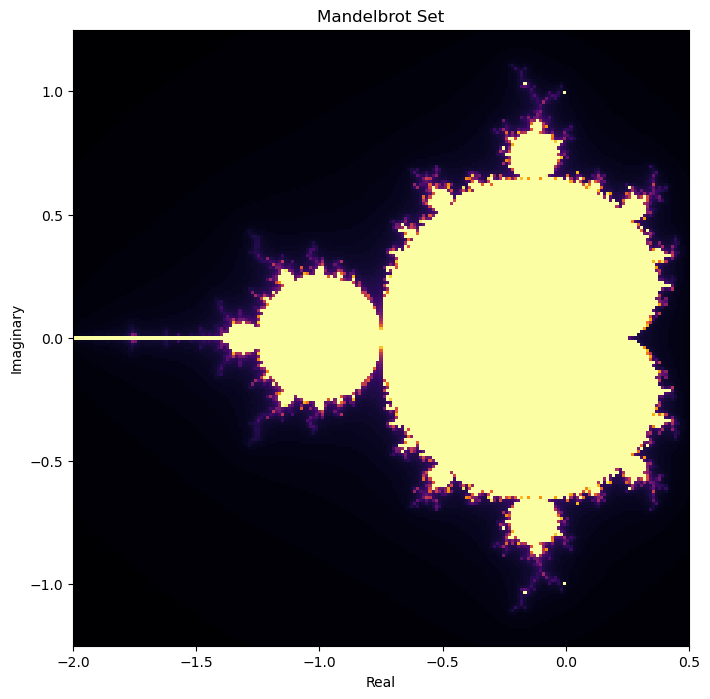

In [48]:
def complexConvergence(C, max_iter=100, threshold=50):
    value = 0
    for i in range(max_iter):
        value = Mandelbrot(value, C)
        if abs(value) > threshold:
            return i
    return max_iter

# Grid
x = np.linspace(-2, 0.5, 201)
y = np.linspace(-1.25, 1.25, 201)

result = np.zeros((len(y), len(x)))

for i, yy in enumerate(y):
    for j, xx in enumerate(x):
        C = complex(xx, yy)
        result[i, j] = complexConvergence(C)

plt.figure(figsize=(8, 8))
plt.imshow(result, extent=[x.min(), x.max(), y.min(), y.max()],
           cmap="inferno", origin="lower", interpolation="nearest")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Mandelbrot Set")
plt.show()

PROBLEM 6

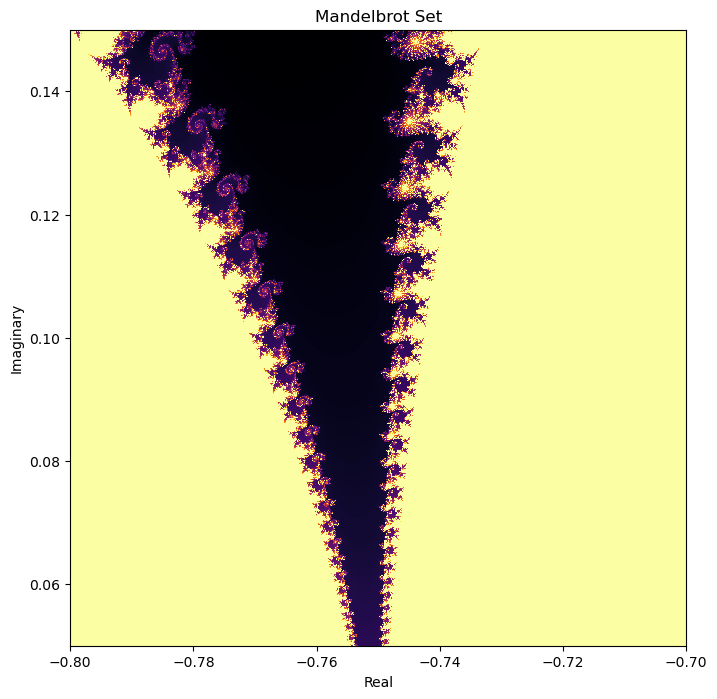

In [65]:
# Grid
x = np.linspace(-0.8, -0.7, 1001)
y = np.linspace(0.05, 0.15, 1001)

result = np.zeros((len(y), len(x)))

for i, yy in enumerate(y):
    for j, xx in enumerate(x):
        C = complex(xx, yy)
        result[i, j] = complexConvergence(C, max_iter=300, threshold=50)

plt.figure(figsize=(8, 8))
plt.imshow(result, extent=[x.min(), x.max(), y.min(), y.max()],
           cmap="inferno", origin="lower", interpolation="nearest")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Mandelbrot Set")
plt.show()

The higher the number of iterations in the series, the more granular the visualization becomes. You can adjust three parameters: the slices of the number line, the number of sequence iterations, and the convergence threshold. Among these, the sequence iterations create the most striking effect, since they directly add precision to the mathematics of the series—where the fascinating phenomenon emerges.

PROBLEM 7

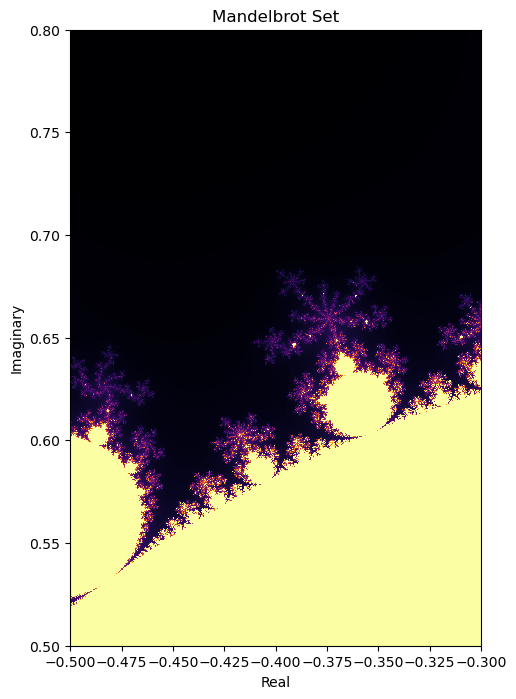

In [68]:
# Grid
x = np.linspace(-0.5, -0.3, 1001)
y = np.linspace(0.5, 0.8, 1001)

result = np.zeros((len(y), len(x)))

for i, yy in enumerate(y):
    for j, xx in enumerate(x):
        C = complex(xx, yy)
        result[i, j] = complexConvergence(C, max_iter=300, threshold=50)

plt.figure(figsize=(8, 8))
plt.imshow(result, extent=[x.min(), x.max(), y.min(), y.max()],
           cmap="inferno", origin="lower", interpolation="nearest")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Mandelbrot Set")
plt.show()

PROBLEM 8

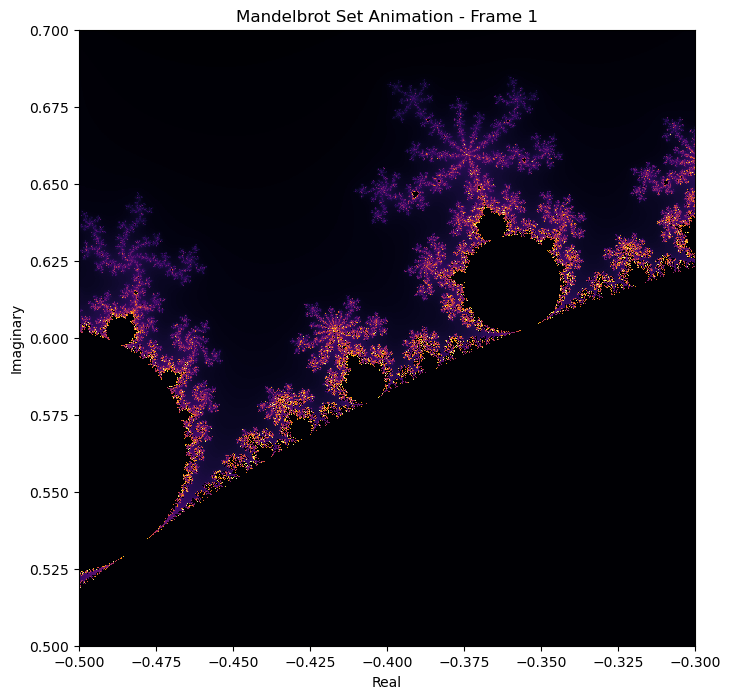

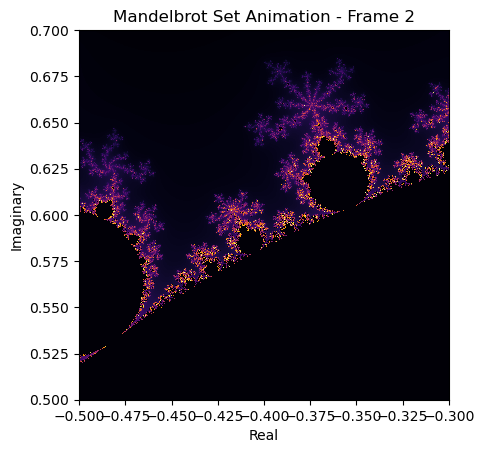

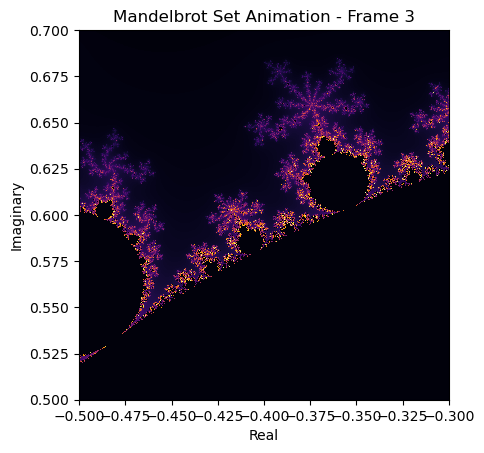

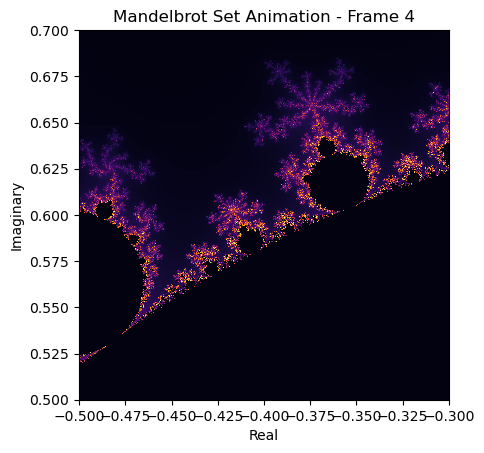

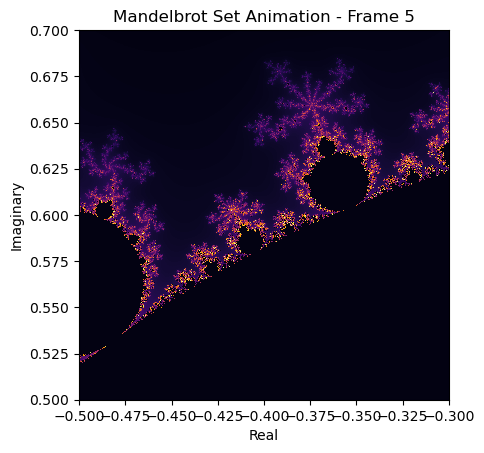

In [69]:
x = np.linspace(-0.5, -0.3, 1001)
y = np.linspace(0.5, 0.7, 1001)

result = np.zeros((len(y), len(x)))

# Mandelbrot iteration function
def complexConvergence(C, max_iter=300, threshold=50):
    value = 0
    for i in range(max_iter):
        if abs(value) < threshold:
            value = value**2 + C
        else:
            return i
    return max_iter

# Compute Mandelbrot values
for i, yy in enumerate(y):
    for j, xx in enumerate(x):
        C = complex(xx, yy)
        result[i, j] = complexConvergence(C, max_iter=300, threshold=50)

# Normalize result
result -= result.min()
max_val = result.max()

plt.figure(figsize=(8, 8))

# Generate 5 frames
for k in range(5):
    result = (result + 2) % max_val  # shift values cyclically
    plt.imshow(result, extent=[x.min(), x.max(), y.min(), y.max()],
               cmap="inferno", origin="lower", interpolation="nearest")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title(f"Mandelbrot Set Animation - Frame {k+1}")
    plt.savefig(f"mandelbrot_frame_{k+1}.png", dpi=150)  # saves each frame
    plt.pause(0.2)
